In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42641_I')

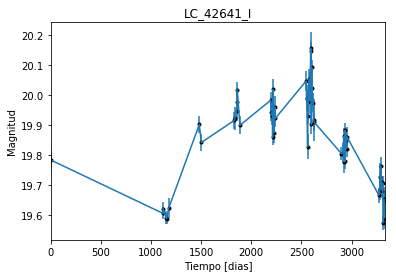

In [2]:
data = np.genfromtxt('LC_42641_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42641_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

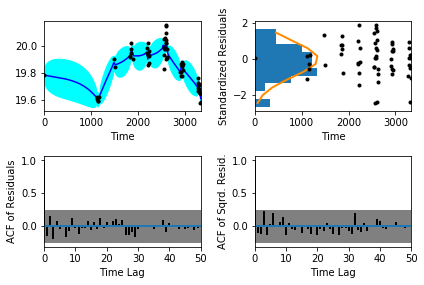

In [5]:
sample.assess_fit()

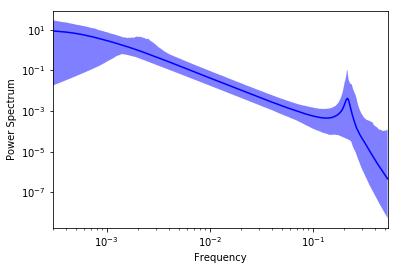

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42641_I')

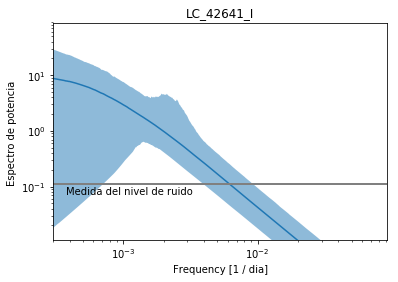

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42641_I')

Text(0.5,1,'Prediccion , valor esperado LC_42641_I')

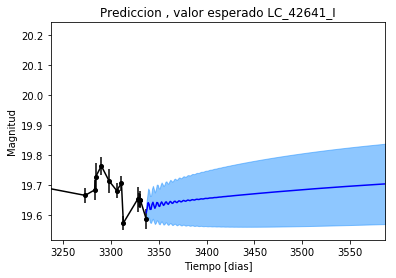

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42641_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42641_I')

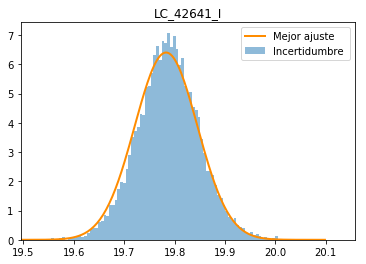

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42641_I')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_I')

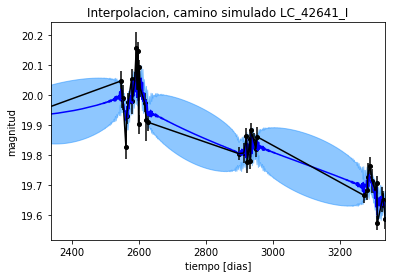

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_I')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_I')

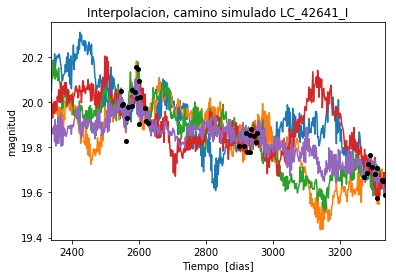

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 92.6868645333
Median: 0.00567975890538
Standard deviation: 0.0740691756374
68% credibility interval: [ 0.00224875  0.01237948]
95% credibility interval: [ 0.00078056  0.11202021]
99% credibility interval: [  3.75179550e-04   6.51358930e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 84.2304687981
Median: 0.00564867488513
Standard deviation: 0.0704692793466
68% credibility interval: [ 0.00219148  0.01217277]
95% credibility interval: [ 0.0006909  0.0961121]
99% credibility interval: [  3.58708003e-04   6.45720726e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 84.8291593009
Median: 0.264091751045
Standard deviation: 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 460.024358228
Median: 109.926667841
Standard deviation: 2.39529630869
68% credibility interval: [ 107.42993331  111.68635427]
95% credibility interval: [ 103.12635604  112.86982506]
99% credibility interval: [ 101.04702692  113.16690485]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 86.928693342
Median: 1.81580419782
Standard deviation: 2.26835410212
68% credibility interval: [ 0.12006059  4.9133893 ]
95% credibility interval: [ 0.04614317  6.64272913]
99% credibility interval: [  0.02271257  11.79019422]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 159.62792545
Median: 2.18034536411
Standard deviation: 11.3821687355
68% credibility interval: [  1.83537541  24.24161165]
95% credibility interval: [  1.62279969  2

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1413.43853603
Median: 1.79847195196e-34
Standard deviation: 4.77720721335e+35
68% credibility interval: [  1.10929166e-64   8.15011386e+02]
95% credibility interval: [  9.04080067e-95   7.47905168e+11]
99% credibility interval: [  5.80721013e-113   3.65074983e+036]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 398.599706554
Median: 19.812741921
Standard deviation: 0.0676297846985
68% credibility interval: [ 19.74842153  19.86988578]
95% credibility interval: [ 19.66732336  19.93580146]
99% credibility interval: [ 19.61245378  19.99567215]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 158.035858884
Median: 0.222389471472
Standard deviation: 0.226411556877
68% credibility interval: [ 0.21090292  0.77735601]
95% credibility interval: [ 0.19398213  0.79933051]
99% credibility interval: [ 0.          0.98495171]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 158.035858884
Median: 0.222389471472
Standard deviation: 0.226411556877
68% credibility interval: [ 0.21090292  0.77735601]
95% credibility interval: [ 0.19398213  0.79933051]
99% credibility interval: [ 0.          0.98495171]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 135.041917036
Median: 0.0
Standard deviation: 0.000534937952389
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 460.024358228
Median: 109.926667841
Standard deviation: 2.39529630869
68% credibility interval: [ 107.42993331  111.68635427]
95% credibility interval: [ 103.12635604  112.86982506]
99% credibility interval: [ 101.04702692  113.16690485]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 779.665712612
Median: 0.022664039812
Standard deviation: 0.0124069367578
68% credibility interval: [ 0.01478918  0.03697603]
95% credibility interval: [ 0.01048147  0.05659486]
99% credibility interval: [ 0.00820262  0.07447138]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 322.96663528
Median: 1.09642772515
Standard deviation: 0.247299044379
68% credibility interval: [ 0.89109216  1.35654302]
95% credibility interval: [ 0.74908265  1.73388422]
99% credibility interval: [ 0.66801198  1.92952305]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 267.127624662
Median: 0.045035292383
Standard deviation: 0.493816053895
68% credibility interval: [  2.61908067e-05   2.17260463e-01]
95% credibility interval: [  3.60757241e-14   1.95763558e+00]
99% credibility interval: [  5.64252823e-39   2.70610400e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 92.6868645333
Median: (-0.0356869777026-1.41516016726j)
Standard deviation: 1.4967760185
68% credibility interval: [-0.07778254-1.65667742j -0.01412932-1.3608837j ]
95% credibility interval: [-0.70384373-5.19906146j -0.00490442-1.33467127j]
99% credibility interval: [ -4.09260886e+00-2.82762066j  -2.35732264e-03-1.32794523j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 84.2304687981
Median: (-0.0354916710433+1.49108154045j)
Standard deviation: 1.48989828619
68% credibility interval: [-0.07648378+1.76193464j -0.01376947+1.37014965j]
95% credibility interval: [-0.60389014+4.79411088j -0.00434107+0.12458621j]
99% credibility interval: [ -4.05718298e+00+5.89584293j  -2.25382885e-03+4.60863989j]
Posterior summary for par